<a href="https://colab.research.google.com/github/rvdrupal/Neural-Networks-and-Deep-Learning/blob/master/Binary_Classifier_Horse_Vs_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating Binary Classifier to distinguish between 2 things

Loading Data.

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-11-03 14:25:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   124MB/s    in 1.2s    

2019-11-03 14:25:47 (124 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



The following python code will use the **OS library to use Operating System libraries**, giving you access to the file system

The zipfile library allowing you to unzip the data.

In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

The contents of the .zip ***are extracted to the base directory /tmp/horse-or-human***, which in turn each contain horses and humans subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc. Later you'll see something called an **ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory**. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step.

Let's define each of these directories:

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

Now, let's see what the filenames look like in the **horses** and **humans** training directories:

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse07-8.png', 'horse44-6.png', 'horse03-7.png', 'horse22-5.png', 'horse40-2.png', 'horse02-5.png', 'horse46-0.png', 'horse34-0.png', 'horse10-1.png', 'horse13-1.png']
['human05-05.png', 'human11-18.png', 'human17-25.png', 'human06-14.png', 'human16-26.png', 'human10-01.png', 'human17-22.png', 'human10-17.png', 'human13-08.png', 'human16-17.png']


Total no of images of horses and humans

In [0]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Pictorial view using matplotlib.pyplot

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import image in 5*5 format
nrows=5
ncols=5

#index for itteration
pic_index=0

Now, display a batch of 10 horse and 10 human pictures. You can rerun the cell to see a fresh batch each time:

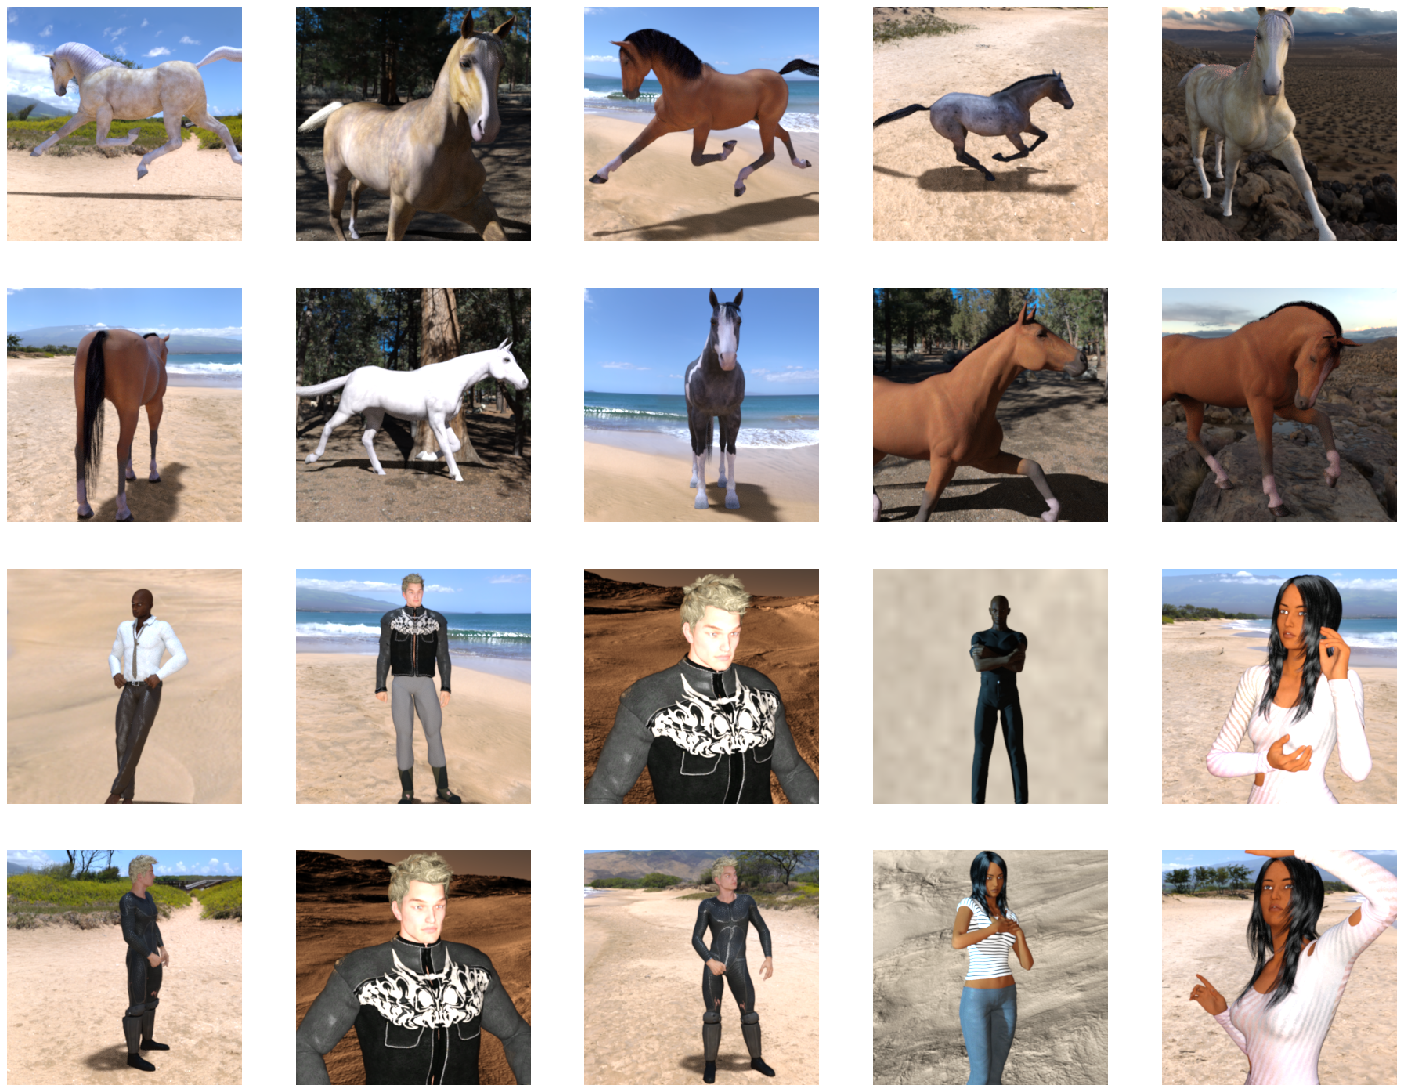

In [0]:
# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)
pic_index += 10
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-10:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-10:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Now we will build a model from scratch

In [0]:
import tensorflow as tf


Adding Convolutional network

In [0]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),#3bit for RGB mode
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

Lets see the summary of above model

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

Creating Compile model

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Data preprocessing using Data Generator
&

Creating Labels in run time using Directory and Sub Directory

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescaling all image into same size
train_datagen=ImageDataGenerator(rescale=1.0/255)
#training images in Batches
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=102,           #128*8=1024
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


Now We just have to train the model we just created

In [0]:
history=model.fit_generator(train_generator,steps_per_epoch=10,epochs=15,verbose=1)

Epoch 1/15
10/10 [==============================] - 8s 785ms/step - loss: 0.5809 - acc: 0.6649
Epoch 2/15
10/10 [==============================] - 7s 672ms/step - loss: 0.2265 - acc: 0.9059
Epoch 3/15
10/10 [==============================] - 7s 729ms/step - loss: 0.1354 - acc: 0.9480
Epoch 4/15
10/10 [==============================] - 6s 617ms/step - loss: 0.0648 - acc: 0.9771
Epoch 5/15
10/10 [==============================] - 7s 672ms/step - loss: 0.0251 - acc: 0.9914
Epoch 6/15
10/10 [==============================] - 7s 673ms/step - loss: 0.0313 - acc: 0.9892
Epoch 7/15
10/10 [==============================] - 7s 740ms/step - loss: 0.0094 - acc: 0.9980
Epoch 8/15
10/10 [==============================] - 7s 669ms/step - loss: 0.0240 - acc: 0.9914
Epoch 9/15
10/10 [==============================] - 7s 675ms/step - loss: 0.0941 - acc: 0.9622
Epoch 10/15
10/10 [==============================] - 6s 602ms/step - loss: 0.0288 - acc: 0.9916
Epoch 11/15
10/10 [==============================

Running the model in validation set


In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) #Insert a new axis that will appear at the axis position in the expanded array shape.

  images = np.vstack([x]) #stack arrays in vertically sequense
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving _103229211_mulea.png to _103229211_mulea (2).png
Saving download.jpg to download (2).jpg
Saving horse1-000.png to horse1-000.png
Saving horse1-105.png to horse1-105.png
Saving horse1-122.png to horse1-122.png
Saving horse1-127.png to horse1-127.png
Saving horse1-170.png to horse1-170.png
Saving horse1-204.png to horse1-204.png
Saving horse1-224.png to horse1-224.png
Saving horse1-241.png to horse1-241.png
Saving horse1-264.png to horse1-264.png
Saving horse1-276.png to horse1-276.png
Saving horse1-298.png to horse1-298.png
Saving horse1-335.png to horse1-335.png
Saving horse1-384.png to horse1-384.png
Saving horse1-411.png to horse1-411.png
Saving horse1-436.png to horse1-436.png
Saving horse1-455.png to horse1-455.png
Saving horse1-484.png to horse1-484.png
Saving horse1-510.png to horse1-510.png
Saving horse1-539.png to horse1-539.png
Saving horse1-554.png to horse1-554.png
Saving horse1-568.png to horse1-568.png
Saving horse2-011.png to horse2-011.png
Saving horse2-040.png to